In [2]:
import pandas as pd
data=pd.read_csv(r"/content/drive/MyDrive/guvi/smart premium/train.csv")

In [3]:
df=data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:

df['Marital Status']=df[['Marital Status']].fillna(df['Marital Status'].mode()[0])
df['Age'] = df[['Age']].fillna(df['Age'].median())
df['Number of Dependents'] = df[['Number of Dependents']].fillna(df['Number of Dependents'].median())
df['Previous Claims'] = df[['Previous Claims']].fillna(df['Previous Claims'].median())
df['Occupation'] = df[['Occupation']].fillna(df['Occupation'].mode()[0])
df['Health Score'] = df[['Health Score']].fillna(df['Health Score'].median())
df['Credit Score'] = df[['Credit Score']].fillna(df['Credit Score'].median())
df['Customer Feedback'] = df[['Customer Feedback']].fillna(df['Customer Feedback'].mode()[0])
df['Vehicle Age'] = df[['Vehicle Age']].fillna(df['Vehicle Age'].median())
df['Insurance Duration'] = df[['Insurance Duration']].fillna(df['Insurance Duration'].median())
df['Annual Income'] = df[['Annual Income']].fillna(df['Annual Income'].median())

In [ ]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

,0
Age,0
Annual Income,0
Number of Dependents,0
Education Level,0
Health Score,0
Location,0
Policy Type,0
Previous Claims,0
Vehicle Age,0
Credit Score,0


In [14]:
nominal_data=['Property Type','Marital Status','Gender','Property Type','Occupation']
ordinal_data=['Education Level', 'Location','Policy Type','Customer Feedback','Exercise Frequency','Smoking Status']

In [15]:
df['Customer Feedback']=df['Customer Feedback'].replace({'Poor':0,'Average':1 , 'Good':2})
df['Exercise Frequency']=df['Exercise Frequency'].replace({'Rarely':0,'Monthly':1 ,'Weekly':2 ,'Daily':3})
df['Location']=df['Location'].replace({'Rural':0,'Suburban':1 , 'Urban':2})
df['Education Level']=df['Education Level'].replace({'High School': 0,"Bachelor's":1 ,"Master's":2, 'PhD':3})
df['Smoking Status']=df['Smoking Status'].replace({'No':0,'Yes':1})
df['Policy Type']=df['Policy Type'].replace({'Basic':0,'Comprehensive':1,'Premium':2})
df=pd.get_dummies(df,columns=nominal_data,dtype='int')
df.drop(['Policy Start Date','id'],axis=1,inplace=True)

<ipython-input-15-6df80672b924>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Feedback']=df['Customer Feedback'].replace({'Poor':0,'Average':1 , 'Good':2})
<ipython-input-15-6df80672b924>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exercise Frequency']=df['Exercise Frequency'].replace({'Rarely':0,'Monthly':1 ,'Weekly':2 ,'Daily':3})
<ipython-input-15-6df80672b924>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

In [7]:
df.head()

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,...,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Property Type_Apartment,Property Type_Condo,Property Type_House,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed
0,19.0,10049.0,1.0,1,22.598761,2,2,2.0,17.0,372.0,...,1,0,1,0,0,0,1,0,1,0
1,39.0,31678.0,3.0,2,15.569731,0,1,1.0,12.0,694.0,...,0,0,1,0,0,0,1,1,0,0
2,23.0,25602.0,3.0,0,47.177549,1,2,1.0,14.0,595.0,...,0,0,0,1,0,0,1,0,1,0
3,21.0,141855.0,2.0,1,10.938144,0,0,1.0,0.0,367.0,...,1,0,0,1,1,0,0,1,0,0
4,21.0,39651.0,1.0,1,20.376094,0,2,0.0,8.0,598.0,...,0,1,0,1,0,0,1,0,1,0


In [72]:
columns = ['Age', 'Annual Income','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration', 'Premium Amount']


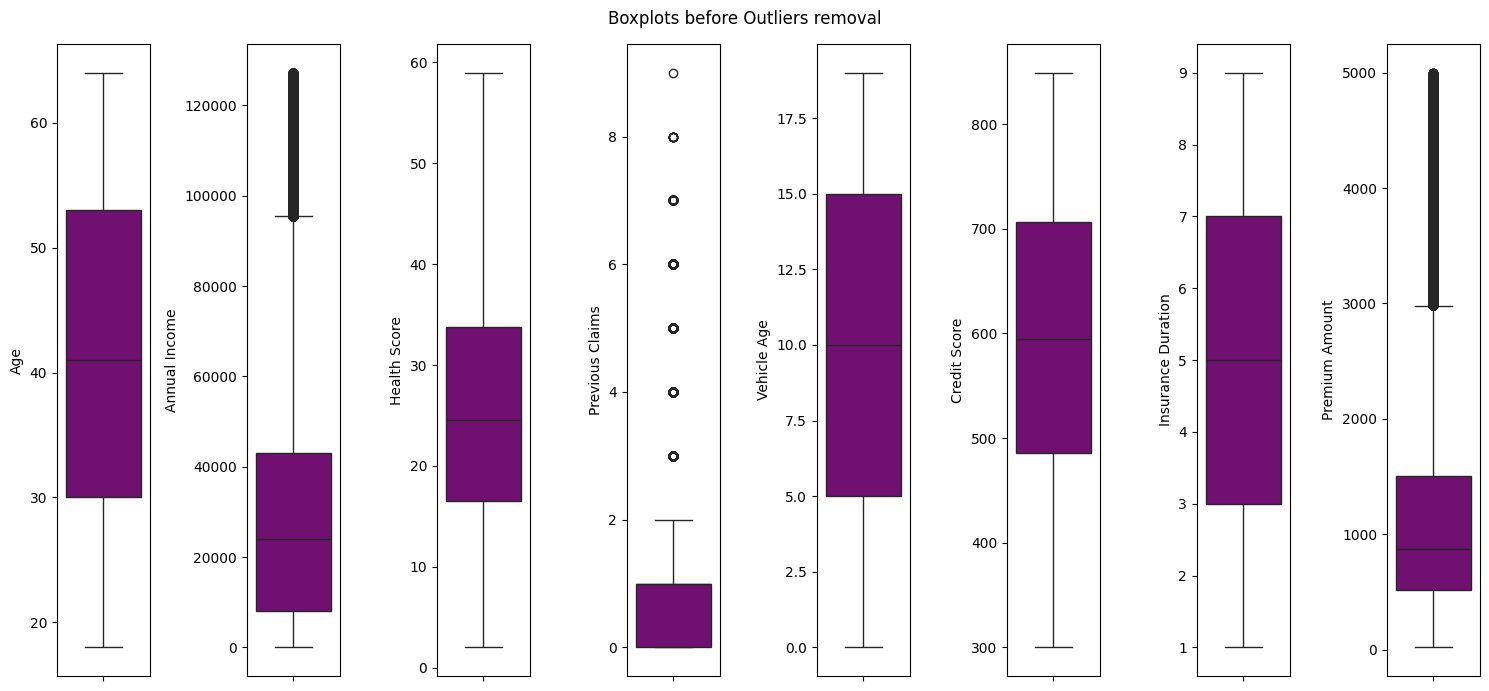

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(columns)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[columns[i]],color='purple',)
    plt.tight_layout()

In [5]:
import numpy as np
outliers=['Annual Income','Previous Claims', 'Premium Amount']
for col in outliers:

    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [29]:
df[['Annual Income','Previous Claims', 'Premium Amount']]

,Annual Income,Previous Claims,Premium Amount
0,10049.0,2.0,2869.0
1,31678.0,1.0,1483.0
2,25602.0,1.0,567.0
3,96871.0,1.0,765.0
4,39651.0,0.0,2022.0
...,...,...,...
1199995,27316.0,1.0,1303.0
1199996,35786.0,1.0,821.0
1199997,51884.0,0.0,371.0
1199998,23911.0,1.0,596.0


In [ ]:
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(columns)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[columns[i]],color='brown')
    plt.tight_layout()

In [11]:
skewness = df[columns].skew()
skewness



,0
Age,-0.012124
Annual Income,1.065354
Health Score,0.307302
Previous Claims,0.321072
Vehicle Age,-0.020410
Credit Score,-0.125786
Insurance Duration,-0.008793
Premium Amount,0.872767


In [6]:
from scipy import stats
df['Premium Amount'], _ = stats.boxcox(df['Premium Amount'])

In [16]:
skewness = df[columns].skew()
skewness

,0
Age,-0.012124
Annual Income,-0.004112
Health Score,0.307302
Previous Claims,0.321072
Vehicle Age,-0.020410
Credit Score,-0.125786
Insurance Duration,-0.008793
Premium Amount,-0.096456


In [7]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Annual Income'] = pt.fit_transform(df[['Annual Income']])
df['Annual Income'] = df['Annual Income'].astype('float64')  # change it into pandas series and apply dtype

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Age                       1200000 non-null  float64
 1   Annual Income             1200000 non-null  float64
 2   Number of Dependents      1200000 non-null  float64
 3   Education Level           1200000 non-null  int64  
 4   Health Score              1200000 non-null  float64
 5   Location                  1200000 non-null  int64  
 6   Policy Type               1200000 non-null  int64  
 7   Previous Claims           1200000 non-null  float64
 8   Vehicle Age               1200000 non-null  float64
 9   Credit Score              1200000 non-null  float64
 10  Insurance Duration        1200000 non-null  float64
 11  Customer Feedback         1200000 non-null  int64  
 12  Smoking Status            1200000 non-null  int64  
 13  Exercise Frequency        1

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_col=['Age', 'Annual Income', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
df[scaler_col] = scaler.fit_transform(df[scaler_col])
# df[columns] = scaler.fit_transform(df[columns])


In [ ]:
skewness = df[columns].skew()
skewness

Age                  -0.012124
Annual Income        -0.115057
Health Score          0.307302
Previous Claims       0.321072
Vehicle Age          -0.020410
Credit Score         -0.125786
Insurance Duration   -0.008793
Premium Amount       -0.096456
dtype: float64

In [ ]:
skewness = df[columns].skew()
skewness

Age                  -0.012124
Annual Income         0.308736
Health Score          0.307302
Previous Claims       0.321072
Vehicle Age          -0.020410
Credit Score         -0.125786
Insurance Duration   -0.008793
Premium Amount       -0.096456
dtype: float64

In [ ]:
df.head()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
from xgboost import XGBRegressor

X=df.drop(['Premium Amount'],axis=1)
# X.isna().sum()
y=df['Premium Amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

models = [LinearRegression(),DecisionTreeRegressor(),XGBRegressor( n_estimators=50, learning_rate=0.1, max_depth=5),RandomForestRegressor(n_estimators=40,max_depth=5,n_jobs=-1)]

for model in models:
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    print(f"****{type(model).__name__}*******")

    print(f"MAE for Training Data : {mean_absolute_error(y_train,train_pred)}")
    print(f"MAE for Test data: {mean_absolute_error(y_test,test_pred)}")

    print("RMSE for training data", np.sqrt(mean_squared_error(y_train, train_pred)))
    print("RMSE for test data", np.sqrt(mean_squared_error(y_test, test_pred)))

    print(f"R2 score for train data: {r2_score(y_train,train_pred)}")
    print(f"R2 score for test data: {r2_score(y_test,test_pred)}")



****LinearRegression*******
MAE for Training Data : 13.604030783870348
MAE for Test data: 13.590221402429359
RMSE for training data 17.067635470980672
RMSE for test data 17.045392445622458
R2 score for train data: 0.0074986585476508605
R2 score for test data: 0.007889302301354872
****DecisionTreeRegressor*******
MAE for Training Data : 2.634929311777038e-18
MAE for Test data: 18.5708634706668
RMSE for training data 2.440370217068073e-16
RMSE for test data 24.04036387035421
R2 score for train data: 1.0
R2 score for test data: -0.9734594030134576
****XGBRegressor*******
MAE for Training Data : 13.050780082402424
MAE for Test data: 13.044892447824855
RMSE for training data 16.629260085258394
RMSE for test data 16.618184800012642
R2 score for train data: 0.057827906148185115
R2 score for test data: 0.05699652850502024
****RandomForestRegressor*******
MAE for Training Data : 13.16120943622929
MAE for Test data: 13.153546939316493
RMSE for training data 16.74947108598216
RMSE for test data 1